# Dogs on Twitter

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gathering Data</a></li>
<li><a href="#tidiness">Assess and Clean for Tidiness Issues</a></li>
<li><a href="#quality">Assess and Clean for Quality Issues</a></li>
<li><a id='#store'>Merge and Save</a></li>
<li><a href="#analysis">Visualization and Analysis</a></li>
</ul>


<a id='intro'></a>
## Introduction
    
In this project I will analyze data about dogs on Twitter by using data from three different sources: 

<ul>
<li>The WeRateDogs Twitter archive which is included in this folder as a csv file</li>
<li>Image Predictions provided by Udacity's servers and downloaded as a tsv file using the Requests library</li>
<li>Retween and Favorite counts pulled from the Twitter API using Python's Tweepy library</li>
</ul>

After pulling the data, I will try to make the data more tidy, and then assess and clean the data for its quality using both visual and programmatic assessments. Once we have data that is easy to work with, I will do a brief analysis to look at the most common names of dogs, the breeds that get the most votes, and what ways people introduce their dogs on Twitter. 

In [2]:
import pandas as pd
import requests
import tweepy
import json

<a id='gather'></a>

# Gather

Let's take a look at the information we have imported directly from files. 

In [3]:
twitter_arc = pd.read_csv('twitter-archive-enhanced.csv')
twitter_arc.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


Now we also want to pull image-predictions from a website, so we are going to need the requests library to bring that in, and then we will save it to a tsv file that we can read to check that everything is working properly

In [4]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
r.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [5]:
with open('image_predictions.tsv', 'wb') as file:
    file.write(r.content)

In [6]:
image_pred = pd.read_csv('image_predictions.tsv', sep='\t')

image_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


This looks okay, so finally let's try to pull some data from Twitter directly using the Tweepy API.

In [7]:
# Authentication Details: load personal API keys (replaced with placeholders)

#deleted for security

# variables for Twitter API connection
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

#let's make sure this is correctly identifying me 
api.verify_credentials(include_email=True)._json['screen_name']

'Hazenwillbot'

In [8]:
i = 0
with open('tweet_json.txt', 'w', encoding='utf8') as f:
  for tweet_id in twitter_arc['tweet_id']:
    i += 1
    try:
      tweet = api.get_status(tweet_id, tweet_mode='extended')
      json.dump(tweet._json, f)
      f.write('\n')
    except:
      print('exception : ', tweet_id)
      continue
print('done')

exception :  888202515573088257
exception :  873697596434513921
exception :  872668790621863937
exception :  872261713294495745
exception :  869988702071779329
exception :  866816280283807744
exception :  861769973181624320
exception :  856602993587888130
exception :  856330835276025856
exception :  851953902622658560
exception :  851861385021730816
exception :  845459076796616705
exception :  844704788403113984
exception :  842892208864923648
exception :  837366284874571778
exception :  837012587749474308
exception :  829374341691346946
exception :  827228250799742977
exception :  812747805718642688
exception :  802247111496568832
exception :  779123168116150273
exception :  775096608509886464
exception :  771004394259247104
exception :  770743923962707968
exception :  766864461642756096
exception :  759923798737051648
exception :  759566828574212096


Rate limit reached. Sleeping for: 725


exception :  754011816964026368
exception :  680055455951884288


Rate limit reached. Sleeping for: 727


done


In [9]:
tweets_data = []
tweet_file = 'tweet_json.txt'

with open(tweet_file, "r") as tweet_file:
    for line in tweet_file:
        try: 
            tweets_data.append(json.loads(line))
        except:
            continue
tweet_file.close()
print('done')

done


In [10]:
tweet_info = pd.DataFrame()

tweet_info["tweet_id"] = list(map(lambda tweet: tweet["id"], tweets_data
))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet["retweet_count"], tweets_data))
tweet_info["favorite_count"] = list(map(lambda tweet: tweet["favorite_count"], tweets_data))


tweet_info.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7075,34129
1,892177421306343426,5344,29613
2,891815181378084864,3513,22297


<a id='access'></a>

# Assess 

We have data coming from three places now-- tweet_info, image_pred, and tweet_json. Let's start by a visual assessment of each.


In [11]:
tweet_info

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7075,34129
1,892177421306343426,5344,29613
2,891815181378084864,3513,22297
3,891689557279858688,7284,37296
4,891327558926688256,7817,35651
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,117,249
2324,666033412701032449,36,100
2325,666029285002620928,39,114


In [12]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [13]:
twitter_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


Let's do some **programatic assessment** as well

In [14]:
print("Twitter Archive Rows:", twitter_arc.shape[0], " \nImage Prediction Rows:", image_pred.shape[0], " \nTweet Info Rows:", tweet_info.shape[0])

Twitter Archive Rows: 2356  
Image Prediction Rows: 2075  
Tweet Info Rows: 2327


These should all be the same, so it looks like there are some discrepencies in our data- likely some duplicates somewhere. 

In [15]:
twitter_arc['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

It looks like the denominator is 10 in the vast majority of cases

In [16]:
twitter_arc['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

It looks like numerators lie mostly between 10 and 12 have very similar results, mostly staying between 10 and 12 with a few outliers. In this case, it might be interesting to group these into below 10, between 10 and 12, and above 12 with category names of "low", "average", and "high" to see if anything interesting is happening there. 

In [17]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

I checked the info of Twitter Archives and found that in_reply_to_status_id and in_reply_to_user_id both only had 73 rows of 2333 populated, so those don't seem useful. 

In [18]:
twitter_arc['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

<a id='tidiness'></a>

# Assess and Clean for Tidiness Issues

I will include the results of the assessment and how I cleaned the data, followed by the code that implements this. 

For scope, I will limit the issues to the required assessment number of two. Before we begin I will make a copy of each dataset.

## Tidiness Issues 

<ul>
    <li><a href="#dogtypes">Dog Categories in Image Prediction</a></li>
    <li><a href="#dogstages">Dog Stages in Twitter Archive</a></li>
</ul>


In [19]:
twitter_arc_clean = twitter_arc.copy()
image_pred_clean = image_pred.copy()
tweet_info_clean = tweet_info.copy()

<a id='dogtypes'></a>
#### Dog Categories in Image Prediction
</br>
<div class="alert alert-block alert-info">
Instead of having six columns with the three most likely dog types and their confidence levels in different columns, let's pare this down to the most likely dog and the confidence level we have for it being that dog separated into two columns. 
    
This fulfills the tidiness criteron of having one variable for one column- I want one confidence result, not six.</div>

In [20]:
# For each row find the breed with the highest confidence (p1_dog, p2_dog, p3_dog are true false values) 
# Append confidence score and breed to arrays 
breed = []
confidence = []
def get_breeds(data):
    if data.p1_dog:
        breed.append(data.p1)
        confidence.append(data.p1_conf)
    elif data.p2_dog:
        breed.append(data.p2)
        confidence.append(data.p2_conf)
    elif data.p3_dog:
        breed.append(data.p3)
        confidence.append(data.p3_conf)
    else:
        breed.append('None')
        confidence.append(0)
image_pred_clean.apply(get_breeds,axis =1)


# Add the new rows and drop the excess
image_pred_clean['dog_breed'] = breed
image_pred_clean['confidence'] = confidence
image_pred_clean.drop(columns = ['p1', 'p1_dog', 'p1_conf' , 'p2', 'p2_dog',
                                 'p2_conf' , 'p3', 'p3_dog', 'p3_conf'],axis=1, inplace =True)

image_pred_clean.head(3)

,tweet_id,jpg_url,img_num,dog_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461


<a id='dogstages'></a>
#### Dog stages in Twitter Archive
</br>
<div class="alert alert-block alert-info">
These dogs are divided into 'doggo,' 'pupper,' 'floofer,' and 'puppo.' Instead of having this information be split into multiple columns, let's make this one column that is called dog_stage.
</div>

In [21]:
STAGES = ['doggo', 'pupper','floofer', 'puppo']
COLUMNS = [i for i in twitter_arc_clean.columns.tolist() if i not in STAGES]


twitter_arc_clean = pd.melt(twitter_arc_clean, id_vars = COLUMNS, value_vars = STAGES, 
                         var_name = 'stages', value_name = 'dog_stage')

Now let's clean up that last column

In [22]:
twitter_arc_clean = twitter_arc_clean.drop('stages', 1)

<a id='quality'></a>
# Assess and Clean for Quality Issues

As I assess, I will add to the following list of quality issues immediately following this header. Each bullet item will link to the later assessment where I will include the results of the assessment and how I cleaned the data, followed by the code that implements it all. 

For scope, I will limit the issues to the required number of eight. 

## Quality Issues

<ul>
    <li><a href="#rating">Ratings are difficult to assess(2 changes)</a></li>
    <li><a href="#discrepencies">Discrepancies  in Dataframes</a></li>
    <li><a href="#inreplyto">In Reply To Statuses Almost Empty in Twitter Archive</a></li>
    <li><a href="#retweet">Retweeted Statuses Almost Empty in Twitter Archive</a></li>
    <li><a href="#dog_breeds_img">Dog Breeds in Image Prediction</a></li>
    <li><a href="#sources">Sources in Twitter Archive</a></li>
    <li><a href="#names">Names in Twitter Archive</a></li>
    <li><a href="#text">Text in Twitter Archive (2 changes)</a></li>
</ul>

<a id='dog_rating'></a>
#### Rating columns in Twitter Archive
</br>
<div class="alert alert-block alert-info">
Almost all of the values in the rating_denominator column were 10 so we assumed that the outliers were typos or misunderstandings, and just dropped them. Then we looked at the quartiles in value counts of the numerator and found that almost all of them ranged between 10 and 12, so we just split this group into rating categories of "low," "average," and "high." We will drop the denominator column altogether and only use this numerator category as we proceed.
</div>

In [23]:
twitter_arc_clean['rating_denominator'].value_counts()

10     9332
50       12
11       12
80        8
20        8
15        4
16        4
40        4
120       4
2         4
90        4
7         4
130       4
170       4
70        4
110       4
150       4
0         4
Name: rating_denominator, dtype: int64

It looks like the denominator is 10 in the vast majority of cases, so we can just drop all of the outliers and assume there was some typo or misreading in the scraping for those. 

In [24]:
indices = twitter_arc[twitter_arc['rating_denominator'] != 10].index
twitter_arc_clean.drop(indices, inplace = True)

twitter_arc_clean['rating_denominator'].value_counts()

10     9332
50        9
11        9
80        6
20        6
15        3
16        3
40        3
120       3
2         3
90        3
7         3
130       3
170       3
70        3
110       3
150       3
0         3
Name: rating_denominator, dtype: int64

It looks like numerators lie mostly between 10 and 12 have very similar results, mostly staying between 10 and 12 with a few outliers. In this case, it might be interesting to group these into below 10, between 10 and 12, and above 12 with category names of "low", "average", and "high" to see if anything interesting is happening there. 

In [25]:
ratings_bins = [-1, 10, 12, 1777]
ratings_names = ['low', 'average', 'high']
twitter_arc_clean['rating_bin'] = pd.cut(twitter_arc['rating_numerator'], ratings_bins, labels=ratings_names)

twitter_arc_clean['rating_bin'].value_counts()

average    1021
low         895
high        417
Name: rating_bin, dtype: int64

This makes it very clear that there are diffrerences in dog rating. Before our dog ratings were basically unreadable, but this gives us a good picture of where ratings fall in comparison with the other pups. 

Now that we have the column we want, let's drop the two extra columns.

In [26]:
cols = ['rating_denominator', 'rating_numerator']
twitter_arc_clean.drop(cols, axis=1, inplace = True)

twitter_arc_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,dog_stage,rating_bin
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,None,high
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,None,high
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,None,average


<a id='discrepencies'></a>
#### Discrepencies in Dataframes
</br>
<div class="alert alert-block alert-info">
I checked to see if each of the three dataframes were the same size, but they were not which means there are some discrepencies in our data frames. I'm mostly worried about duplicates of import information so I looked at the images that are the same in image_predictions (there were 66), text duplications in twitter_archives (none) and tweet ids from Tweepy (also none). With this I decided to just delete the 66 duplicates from the image predicions. 
</div>

In [27]:
print("Twitter Archive Rows:", twitter_arc_clean.shape[0], " \nImage Prediction Rows:", image_pred_clean.shape[0], " \nTweet Info Rows:", tweet_info_clean.shape[0])

Twitter Archive Rows: 9401  
Image Prediction Rows: 2075  
Tweet Info Rows: 2327


In [28]:
image_pred_clean[image_pred_clean['jpg_url'].duplicated()==True]['jpg_url'].value_counts()

https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg    1
https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg    1
https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg    1
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg    1
https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg    1
                                                  ..
https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg    1
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg    1
https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg    1
https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg    1
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg    1
Name: jpg_url, Length: 66, dtype: int64

In [29]:
twitter_arc_clean[twitter_arc_clean['text'].duplicated()==True]['text'].value_counts()

This is Willy. He's millennial af. 11/10 https://t.co/Fm1SvVLsad                                                                                                      3
Meet Jesse. He's a Fetty Woof. His tongue ejects without warning. A true bleptomaniac. 12/10 would snug well https://t.co/fUod0tVmvK                                  3
This is Scooter and his son Montoya.  Scooter is a wonderful father. He takes very good care of Montoya. Both 12/10 would pet at same time https://t.co/ghqMfxxa4V    3
This is Toby. A cat got his tongue. 13/10 adorable af https://t.co/fHQrBKYSLC                                                                                         3
This is Sweet Pea. She hides in shoe boxes and waits for someone to pick her. Then she surpuprises them. 13/10 https://t.co/AyBEmx56MD                                3
                                                                                                                                                                

In [30]:
tweet_info_clean[tweet_info_clean['tweet_id'].duplicated()==True]['tweet_id'].value_counts()

Series([], Name: tweet_id, dtype: int64)

In [47]:
#clear it out
image_pred_clean = image_pred_clean[image_pred_clean['jpg_url'].duplicated() ==False] 


image_pred_clean[image_pred_clean['jpg_url'].duplicated()==True]['jpg_url'].value_counts()

Series([], Name: jpg_url, dtype: int64)

<a id='inreplyto'></a>
#### In Reply To Statuses Almost Empty
</br>
<div class="alert alert-block alert-info">
I checked the info of Twitter Archives and found that in_reply_to_status_id and in_reply_to_user_id both only had 73 rows of 2333 populated, so I decided to drop them
</div>

In [48]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9309 entries, 0 to 9331
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    9309 non-null   int64   
 1   in_reply_to_status_id       292 non-null    float64 
 2   in_reply_to_user_id         292 non-null    float64 
 3   timestamp                   9309 non-null   object  
 4   source                      9309 non-null   object  
 5   text                        9309 non-null   object  
 6   retweeted_status_id         719 non-null    float64 
 7   retweeted_status_user_id    719 non-null    float64 
 8   retweeted_status_timestamp  719 non-null    object  
 9   expanded_urls               9089 non-null   object  
 10  name                        9309 non-null   object  
 11  dog_stage                   9309 non-null   object  
 12  rating_bin                  2333 non-null   category
dtypes: category(1), fl

In [49]:
twitter_arc_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id'],axis=1, inplace =True)

twitter_arc_clean.head(3)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,dog_stage,rating_bin
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,None,high
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,None,high
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,None,average


<a id='retweet'></a>
#### Retweeted Statuses Almost Empty in Twitter Archive
</br>
<div class="alert alert-block alert-info">
I checked the info of Twitter Archives and found that retweet statuses had only 180 rows of 2333 populated, so I decided to drop them all as well.
</div>

In [50]:
twitter_arc_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1, inplace =True)

twitter_arc_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,rating_bin
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,high
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,high
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,average


<a id='dog_breeds_img'></a>
#### Dog Breeds in Image Prediction
</br>
<div class="alert alert-block alert-info">
This one is mostly my own fault. I created this tidier column to show the dog breeds, but I didn't normalize the names. So here I went in and took out all of the dashes in between the breed names and made them all title cased. I also noticed that there are a couple of types of retrievers and terriers in the breeds I could see so I checked to see if there were anymore larger-type breeds we could split them out into. It looks like Poodles and possibly Spaniels also can be split into subcategories.  
</div>

In [51]:
image_pred_clean.head(3)

,tweet_id,jpg_url,img_num,dog_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461


In [52]:
breeds = image_pred_clean.dog_breed.value_counts()
breeds.head(30)

None                           318
golden_retriever               158
Labrador_retriever             108
Pembroke                        95
Chihuahua                       91
pug                             63
toy_poodle                      51
chow                            48
Pomeranian                      42
Samoyed                         42
malamute                        33
Chesapeake_Bay_retriever        31
French_bulldog                  31
cocker_spaniel                  30
miniature_pinscher              25
Eskimo_dog                      22
German_shepherd                 21
Cardigan                        21
Staffordshire_bullterrier       21
beagle                          20
Siberian_husky                  20
Shih-Tzu                        20
Rottweiler                      19
Maltese_dog                     19
Shetland_sheepdog               19
kuvasz                          19
Lakeland_terrier                18
Italian_greyhound               17
basset              

In [53]:
image_pred_clean['dog_breed_proper'] = image_pred_clean.dog_breed.str.replace('_', ' ').str.title()
image_pred_clean['dog_breed_proper'].value_counts().head(10)

None                  318
Golden Retriever      158
Labrador Retriever    108
Pembroke               95
Chihuahua              91
Pug                    63
Toy Poodle             51
Chow                   48
Samoyed                42
Pomeranian             42
Name: dog_breed_proper, dtype: int64

In [54]:
image_pred_clean['dog_breed_proper_last_word'] = image_pred_clean.dog_breed_proper.str.split(' ').str[-1]
image_pred_clean['dog_breed_proper_last_word'].value_counts().head(10)

None         318
Retriever    308
Terrier      119
Pembroke      95
Chihuahua     91
Poodle        70
Pug           63
Spaniel       59
Dog           55
Chow          48
Name: dog_breed_proper_last_word, dtype: int64

<a id='sources'></a>
#### Sources in Twitter Archive
</br>
<div class="alert alert-block alert-info">
The sources looked a bit odd visually so I did some programatic assessment and found that there are four sources for these tweets: Twitter for iPhone, Vine, the Twitter web client, and TweetDeck (which it looks like is a client for social media dashboard application management of twitter accounts). I decided to put them into more readable variables in our dataframe: iPhone, Vine, Web, and TweetDeck
</div>

In [55]:
twitter_arc_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     8771
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                         363
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      131
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      44
Name: source, dtype: int64

It looks like there are only four sources so let's put them into a more readable form in our dataframe.  

In [56]:
# For each row find the breed with the highest confidence (p1_dog, p2_dog, p3_dog are true false values) 
# Append confidence score and breed to arrays 
sources = []
def get_sources(data):
    if data.source == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        sources.append("iPhone")
    elif data.source == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
        sources.append("vine")
    elif data.source == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
        sources.append("web")
    elif data.source == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':
        sources.append("TweetDeck")
    else:
        sources.append('Error')
twitter_arc_clean.apply(get_sources,axis =1)


# Add the new rows and drop the excess
twitter_arc_clean['sources'] = sources
twitter_arc_clean.drop(columns = ['source'],axis=1, inplace =True)

twitter_arc_clean.head(3)

,tweet_id,timestamp,text,expanded_urls,name,dog_stage,rating_bin,sources
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,high,iPhone
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,high,iPhone
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,average,iPhone


<a id='names'></a>
#### Names in Twitter Archive
</br>
<div class="alert alert-block alert-info">
Let's make all of the names lowercase and see if we can't do a better assessment on common names.
</div>

In [57]:
twitter_arc_clean['normalized_name'] = twitter_arc_clean['name'].str.lower()

names = twitter_arc_clean['normalized_name'].value_counts()

names.head(30)

none       2906
a           216
charlie      47
lucy         43
cooper       43
oliver       43
lola         40
penny        40
tucker       40
winston      36
bo           35
sadie        32
the          32
bailey       28
buddy        28
toby         28
daisy        28
stanley      24
dave         24
leo          24
jack         24
bella        24
koda         24
scout        24
rusty        24
an           24
jax          24
milo         24
oscar        23
bentley      20
Name: normalized_name, dtype: int64

It looks like this might almost be an exponential drop in how common names are, which is interesting. I'm definitely interested in plotting that out to see it visually. 

I'm a little concerned with our top name being "a" and also seeing "the" and "an" in the list. It makes me worry that if we look at the bottom few names we'll just get a list of random words that were scrapped incorrectly. Let's take a look: 

In [58]:
names = twitter_arc_clean['normalized_name'].value_counts(ascending=True)
names.head(20)

stefan       3
banjo        3
petrick      3
miguel       3
berb         3
charleson    3
jaycob       4
jimbo        4
sweet        4
clifford     4
wishes       4
hermione     4
alf          4
dwight       4
zooey        4
dunkin       4
mookie       4
humphrey     4
boston       4
norman       4
Name: normalized_name, dtype: int64

This looks fine to me. There's only one "word" that doesn't look like a name ("incredibly") which seems like an okay rate of error. Let's drop the original names column and move on.

In [59]:
import numpy as np

In [60]:
cols = ['name']
twitter_arc_clean.drop(cols, axis=1, inplace = True)

twitter_arc_clean.head(3)

,tweet_id,timestamp,text,expanded_urls,dog_stage,rating_bin,sources,normalized_name
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,None,high,iPhone,phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,None,high,iPhone,tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,None,average,iPhone,archie


<a id='text'></a>
#### Text in Twitter Archive
</br>
<div class="alert alert-block alert-info">
I sampled a few rows of text from the Twitter Archive dataframe so that I could get an idea of similarities. It looked like I was seeing a lot of tweets starting with "This is..." so I decided to check that percentage and found that it was almost half (49%). I also saw many starting with "Here.." but it turned out to only be about 4% of starters. I realized could just check for the value counts of first words in the text column to figure out which are the most frequent. My first discovery ("This") is by far the most frequent with 1200 counts, with my second guess ("Here") coming in at 5th with only 49 counts. 
I decided to also check the second to last words (the last is usually the image or a link) and found that almost all of them are ratings, with 10/10, 10/11, 10/12, and 10/13 all in the top five most frequent endings. Our only outlier in the top five is "af" which comes in as the second most popular ending. 
</div>

In [61]:
twitter_arc_clean.text.sample(20)

8103    "Ello this is dog how may I assist" ...10/10 h...
2945    Here's a sleepy doggo that requested some assi...
6938    Extremely intelligent dog here. Has learned to...
2035    This is Lou. He's a Petrarch Sunni Pinto. Well...
6750    This is Edd. He's a Czechoslovakian Googolplex...
1484    This is a rare Arctic Wubberfloof. Unamused by...
3674    Meet Scooter. He's experiencing the pupper equ...
3750    Say hello to Pherb. He does parkour. 9/10 http...
4885    This is Riley. He's making new friends. Jubila...
1408    This is Lily. She accidentally dropped all her...
1739    Meet Tango. He's a large dog. Doesn't care muc...
3435    This is Terry. The harder you hug him the fart...
3730    This is Oliver. He does toe touches in his sle...
5836    Meet Sid &amp; Murphy. Murphy floats alongside...
9215    This is Alfie. He's that one hypocritical gym ...
1689    This is Brody. That is his chair. He loves his...
5919    WeRateDogs stickers are here and they're 12/10...
5171    I'm ha

In [62]:
this_is = twitter_arc_clean.text[twitter_arc_clean.text.str.match('This is.*')]
print(this_is.shape[0], " / ", twitter_arc_clean.text.shape[0], " which is a total of ", this_is.shape[0]/twitter_arc_clean.text.shape[0], "%" )

4552  /  9309  which is a total of  0.48898915028467077 %


In [63]:
here = twitter_arc_clean.text[twitter_arc_clean.text.str.match('Here.*')]
print(here.shape[0], " / ", twitter_arc_clean.text.shape[0], " which is a total of ", here.shape[0]/twitter_arc_clean.text.shape[0], "%" )

375  /  9309  which is a total of  0.04028359651949726 %


In [64]:
meet = twitter_arc_clean.text[twitter_arc_clean.text.str.match('Meet.*')]
print(meet.shape[0], " / ", twitter_arc_clean.text.shape[0], " which is a total of ", meet.shape[0]/twitter_arc_clean.text.shape[0], "%" )

858  /  9309  which is a total of  0.09216886883660973 %


At about this point I realized I could just check for the value counts of first words in the text column to figure out which are the most frequent. Turns out my first discovery ("This") is by far the most frequent with 1200 counts, with my second guess ("Here") coming in at 5th with only 49 counts. 

In [65]:
twitter_arc_clean['first_word'] = twitter_arc_clean.text.str.split(' ').str[0]
twitter_arc_clean['first_word'].value_counts()

This        4788
Meet         858
RT           727
Say          374
Here         196
            ... 
Ok             4
Martha         4
Idk            4
We.            4
*screams       4
Name: first_word, Length: 282, dtype: int64

In [66]:
twitter_arc_clean['last_word'] = twitter_arc_clean.text.str.split(' ').str[-2]
twitter_arc_clean['last_word'].value_counts()

10/10                               708
11/10                               672
12/10                               563
af                                  488
13/10                               330
                                   ... 
14/10\n\nhttps://t.co/XQlmPTLHPl      3
both)                                 3
fire                                  3
12/10\n\nhttps://t.co/P0bO8mCQwN      3
Berb                                  3
Name: last_word, Length: 656, dtype: int64

<a id='store'></a>
## Merge and Save

In [67]:
twitter_archive_clean = pd.merge(twitter_arc_clean, tweet_info_clean , how = 'left' , on = 'tweet_id')

master_dataset = pd.merge(twitter_archive_clean, image_pred_clean , how = 'inner' , on = 'tweet_id')

master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7943 entries, 0 to 7942
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    7943 non-null   int64   
 1   timestamp                   7943 non-null   object  
 2   text                        7943 non-null   object  
 3   expanded_urls               7943 non-null   object  
 4   dog_stage                   7943 non-null   object  
 5   rating_bin                  1992 non-null   category
 6   sources                     7943 non-null   object  
 7   normalized_name             7943 non-null   object  
 8   first_word                  7943 non-null   object  
 9   last_word                   7943 non-null   object  
 10  retweet_count               7895 non-null   float64 
 11  favorite_count              7895 non-null   float64 
 12  jpg_url                     7943 non-null   object  
 13  img_num           

In [68]:
master_dataset.to_csv("twitter_archive_master.csv", encoding='utf-8')        # 
print("Saved-- twitter_archive_master.csv")

Saved-- twitter_archive_master.csv


<a id='analysis'></a>
## Visualization and Analysis
    
 

In [73]:
import matplotlib.pyplot as plt

#### What are the most common dog names on Twitter? 

</br>
<div class="alert alert-block alert-info">
The most common name is Charlie, and in the top 20 names there are almost twice as many male names as female names. 
</div>

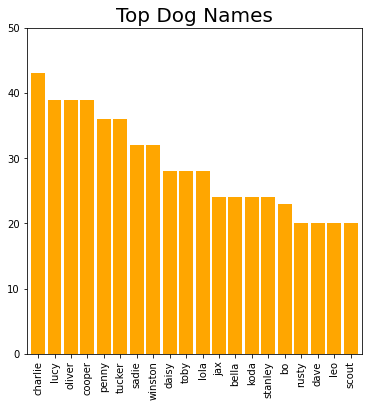

In [75]:
# rank the names frequency in a descending order, take out the dumb ones (none, the, an , and a)
names = master_dataset.query('normalized_name != "none" & normalized_name != "the" & normalized_name != "a" & normalized_name != "an"').normalized_name.value_counts().sort_values(ascending=False)[:20]
fig, ax = plt.subplots(figsize = (6,6))
ax = plt.axes()
ax.set_title("Top Dog Names", fontsize=20)
plt.grid(color='w', linestyle='solid')
names.plot(kind="bar",label="number of dogs", width=.85,color=['#ffa600'], ylim=[0,50])

It looks like the most popular dog name is Charlie, followed closely by Lucy, Cooper, and Oliver. In the top 20 it looks like there are almost twice as many male names as female names (note: I didn't count Koda in this assessment as I am not sure which gender it belongs to). I'm interested in where this curve bottoms out.

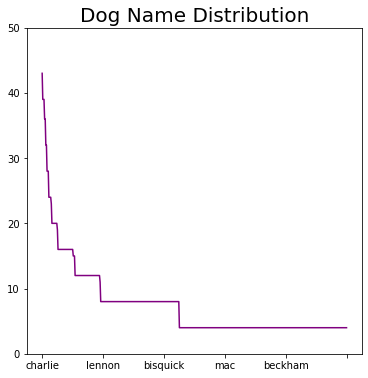

In [77]:
names = master_dataset.query('normalized_name != "none" & normalized_name != "the" & normalized_name != "a" & normalized_name != "an"').normalized_name.value_counts().sort_values(ascending=False)[:500]
fig, ax = plt.subplots(figsize = (6,6))
ax = plt.axes(facecolor='white')
ax.set_title("Dog Name Distribution", fontsize=20)
plt.grid(color='w', linestyle='solid')
names.plot(kind="line", color=['purple'], ylim=[0,50])

#### How do people introduce their dog?

</br>
<div class="alert alert-block alert-info">
In our exploration we learned that "This" (as in "This is...") accounts for almost half of the introductions to people's dogs. I'm taking that out as an outlier so that we can better visualize how the rest of the Twitter population introduces their pups. It looks like the rest often say "Meet" or "Say" (likely "Say hello"). There are also a large number of people who say "I" or "We" and then there are groups that either plead with the audience to greet their dog ("Please") or maybe tell a quick story about the photo ("When").</div>

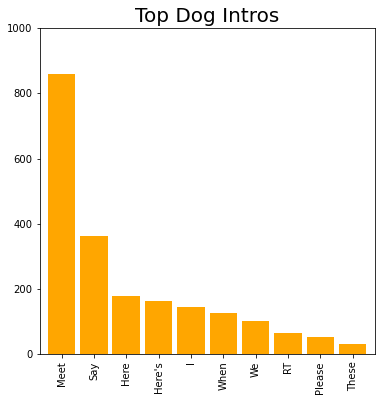

In [82]:
# rank the names frequency in a descending order, take out the top one for scale
names = master_dataset.query('first_word != "This"').first_word.value_counts().sort_values(ascending=False)[:10]
fig, ax = plt.subplots(figsize = (6,6))
ax = plt.axes()
ax.set_title("Top Dog Intros", fontsize=20)
plt.grid(color='w', linestyle='solid')
names.plot(kind="bar", width=.85,color=['#ffa600'], ylim=[0,1000])

#### Which types of dogs are the highest and lowest rated?
</br>
<div class="alert alert-block alert-info">
For this one I dug into the ratings bins we made and compared that to the breeds of dogs. In our top rated dogs and average rated dogs, the most common breed was the Golden Retriever, but that breed didn't even show up in the least rated dogs. People must love Golden Retrievers. Our most common breed in the bottom rated dogs was the Chihuahua which only got about 9% of the vote in both the top rated and average rated groups. It definitely looks like breed has some influence on the rating of the dogs on Twitter.
</div>

In [1]:
# rank the names frequency in a descending order, take out the top one for scale
names = master_dataset.query('rating_bin == "high" & dog_breed_proper != "None"').dog_breed_proper.value_counts().sort_values(ascending=False)[:10]
fig, ax = plt.subplots(figsize = (6,6))
ax = plt.axes()
ax.set_title("Favorite Dog Breeds on Twitter", fontsize=20)
plt.grid(color='white', linestyle='solid')
ax.set_ylabel('')
plt.axis('off')
names.plot(kind="pie",autopct='%1.1f%%', legend=False, explode=(names == max(names)) * 0.1, colors=['#86C1C4', '#ffc6ff', '#bdb2ff', '#a0c4ff', '#9bf6ff', '#caffbf', '#fdffb6', '#ffd6a5', '#f59ae0', '#ffadad'])


NameError: name 'master_dataset' is not defined

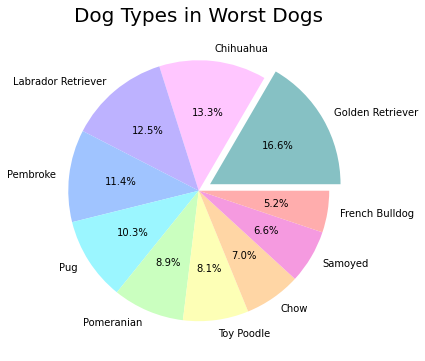

In [84]:
# rank the names frequency in a descending order, take out the top one for scale
names = master_dataset.query('rating_bin == "low" & dog_breed_proper != "None"').dog_breed_proper.value_counts().sort_values(ascending=False)[:10]
fig, ax = plt.subplots(figsize = (6,6))
ax = plt.axes()
ax.set_title("Least Favorite Dog Breeds on Twitter", fontsize=20)
plt.grid(color='w', linestyle='solid')
ax.set_ylabel('')
plt.axis('off')
names.plot(kind="pie",autopct='%1.1f%%', legend=False, explode=(names == max(names)) * 0.1, colors=['#86C1C4', '#ffc6ff', '#bdb2ff', '#a0c4ff', '#9bf6ff', '#caffbf', '#fdffb6', '#ffd6a5', '#f59ae0', '#ffadad'])


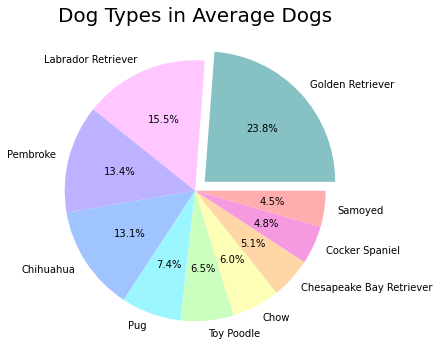

In [85]:
# rank the names frequency in a descending order, take out the top one for scale
names = master_dataset.query('rating_bin == "average" & dog_breed_proper != "None"').dog_breed_proper.value_counts().sort_values(ascending=False)[:10]
fig, ax = plt.subplots(figsize = (6,6))
ax = plt.axes()
ax.set_title("Dog Types in Average Dogs", fontsize=20)
plt.grid(color='w', linestyle='solid')
ax.set_ylabel('')
plt.axis('off')
names.plot(kind="pie",autopct='%1.1f%%', legend=False, explode=(names == max(names)) * 0.1, colors=['#86C1C4', '#ffc6ff', '#bdb2ff', '#a0c4ff', '#9bf6ff', '#caffbf', '#fdffb6', '#ffd6a5', '#f59ae0', '#ffadad'])
